## K-means 範例


## 範例目標：讓同學了解如何使用 sklearn 執行 k-means

## 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 <font color="red">restart kernel</font>

In [1]:
# # !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

     |████████████████████████████████| 14.4MB 714kB/s eta 0:00:01


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

## 載入 toy example 資料集

In [2]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

## 設定 模型 估計參數

In [3]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

## 資料建模 並 視覺化 結果

/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


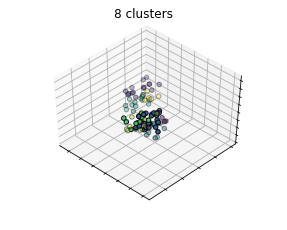

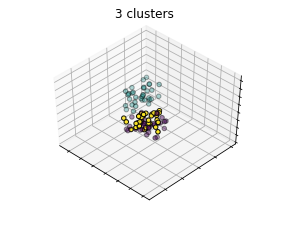

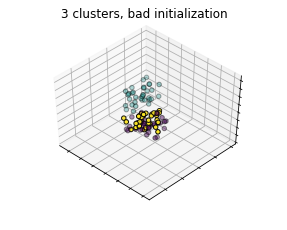

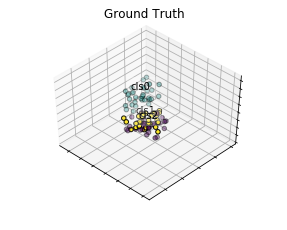

In [4]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## 社區問答

https://www.cupoy.com/qa/kwassist/ai_tw/0000016B6E64931E000001816375706F795F72656C656173655155455354


Rosa・2019/06/19 14:20  #ml100-2  #ml100-2-d55 #D55_ground truth


請問Day_055_kmean_sample.ipynb最後產生的ground truth是甚麼意思呢？

我有上網查了一下ground truth=訓練集對監督學習技術的分類的準確性。

但還是沒有很能理解，要怎麼解讀ground truth的結果會比較好呢？謝謝

![img](http://kwassistfile.cupoy.com/0000016B6E64931E000001816375706F795F72656C656173655155455354/1560314760976/large)

--


張維元 (WeiYuan Chang)・2019/06/19 17:27

ground truth 只是的原始的資料，也就是直接從 X，Y 直接畫出來的結果。這邊的脈絡是，把分成不同數量的 Cluster 結果跟原始的資料做比較。

看分成幾個 Cluster 的結果最貼近真實的 ground truth 。




## 作業

作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

載入 相關套件 並 執行 kmean 實驗 ...

實驗測試不同的群數

實驗測試不同的初始值

呈現結果

In [5]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
np.random.seed(5)
%matplotlib inline

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.5027144446956527
For n_clusters = 3 The average silhouette_score is : 0.6105565451092732
For n_clusters = 4 The average silhouette_score is : 0.6270122040179333
For n_clusters = 5 The average silhouette_score is : 0.6115749260799671
For n_clusters = 6 The average silhouette_score is : 0.5499388428924794
For n_clusters = 7 The average silhouette_score is : 0.4695416652197068
For n_clusters = 8 The average silhouette_score is : 0.4231800504179843


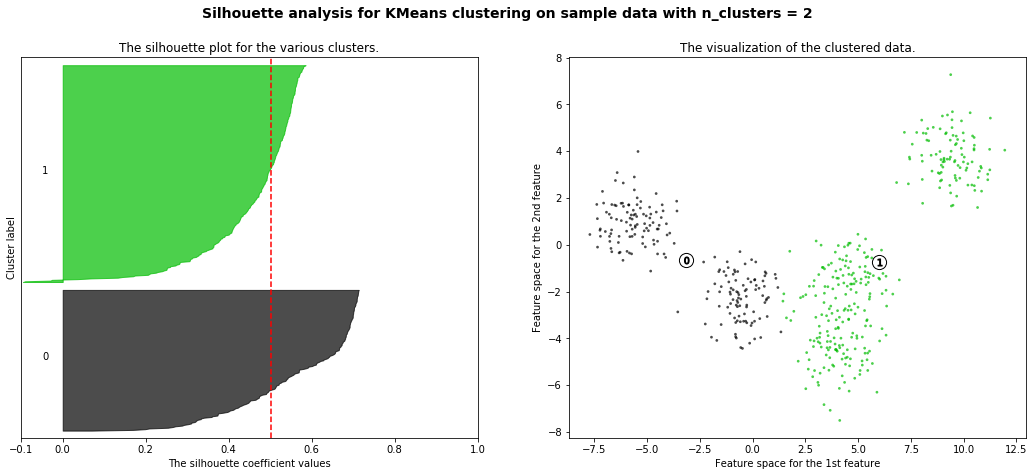

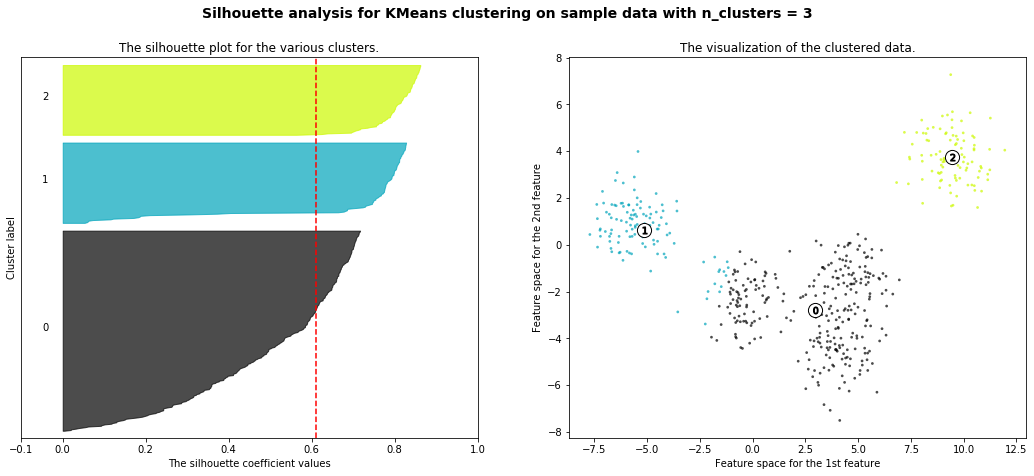

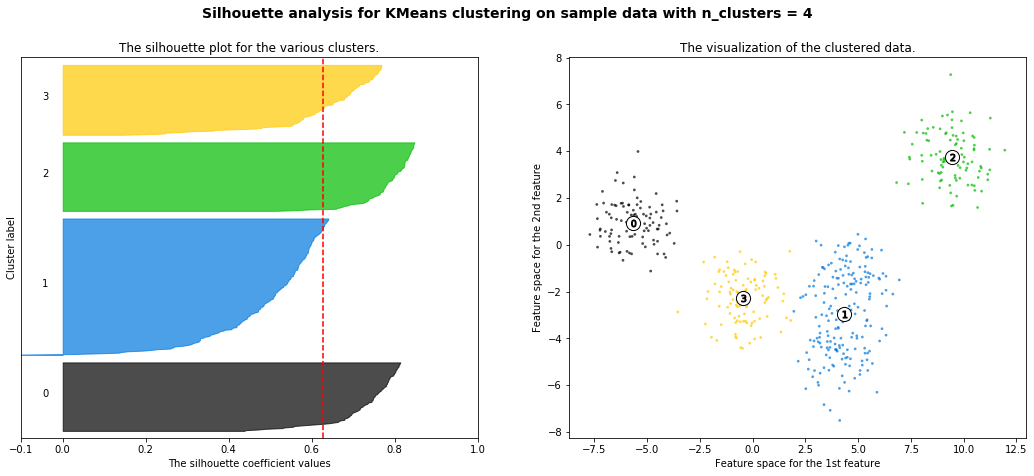

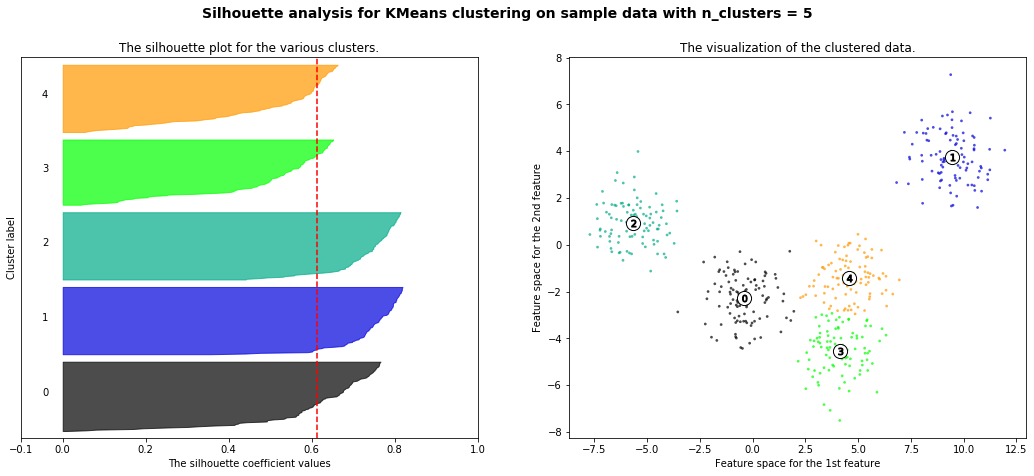

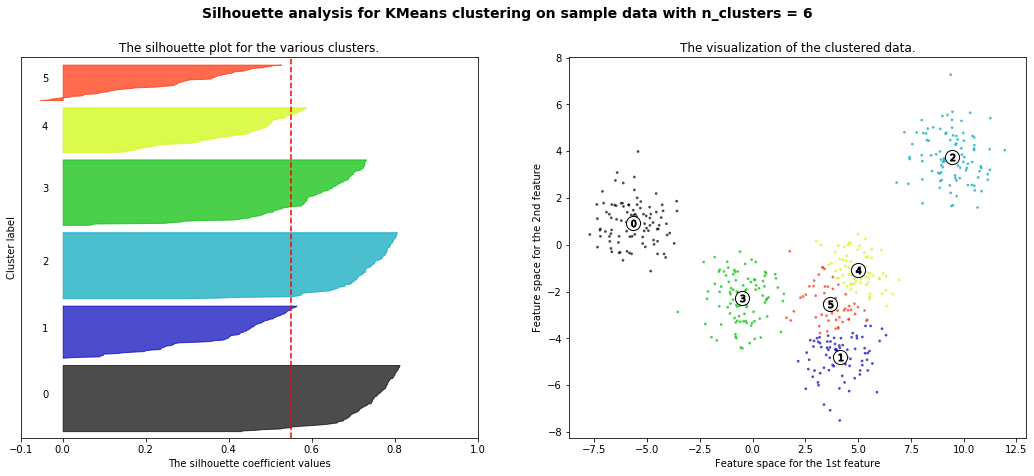

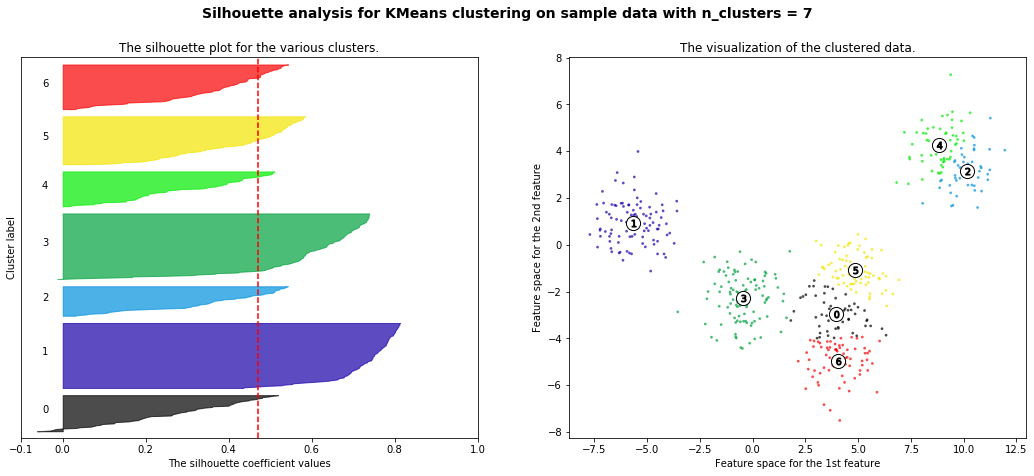

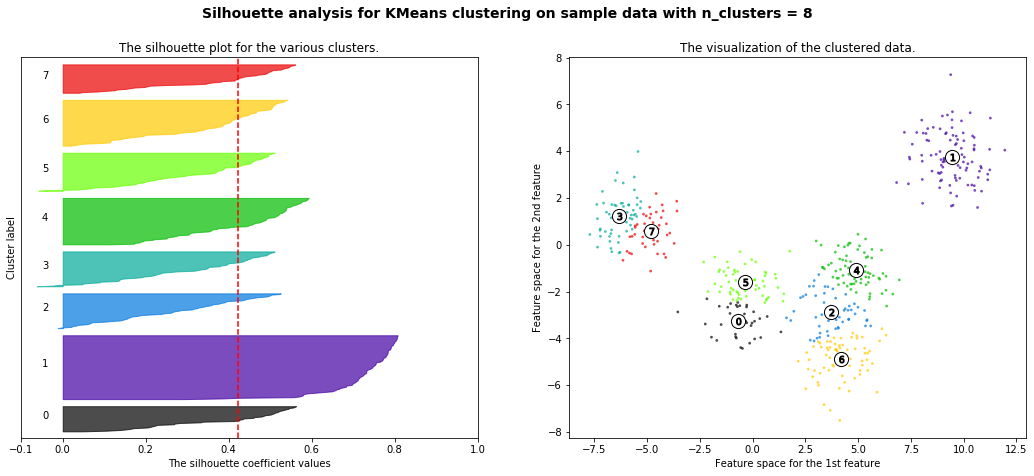

In [8]:
# 計算並繪製輪廓分析的結果

nClusters = []
avgSilhouette_eachCluster = []

for n_clusters in range_n_clusters:
    # 設定小圖排版為 1 row 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 左圖為輪廓分析(Silhouette analysis), 雖然輪廓係數範圍在(-1,1)區間, 但範例中都為正值, 因此我們把顯示範圍定在(-0.1,1)之間
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 宣告 KMean 分群器, 對 X 訓練並預測
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    avgSilhouette_eachCluster.append(silhouette_avg)
    nClusters.append(n_clusters)

    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 將 silhouette_score 平均所在位置, 畫上一條垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清空 y 軸的格線
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [9]:
list(zip(nClusters, avgSilhouette_eachCluster))

[(2, 0.5027144446956527),
 (3, 0.6105565451092732),
 (4, 0.6270122040179333),
 (5, 0.6115749260799671),
 (6, 0.5499388428924794),
 (7, 0.4695416652197068),
 (8, 0.4231800504179843)]

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
estimators = [('k_means_3', KMeans(n_clusters=3)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_bad_4_init', KMeans(n_clusters=4, n_init=1,
                                               init='random')),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_8', KMeans(n_clusters=8)),
              ('k_means_bad_8_init', KMeans(n_clusters=8, n_init=1,
                                               init='random'))]

/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


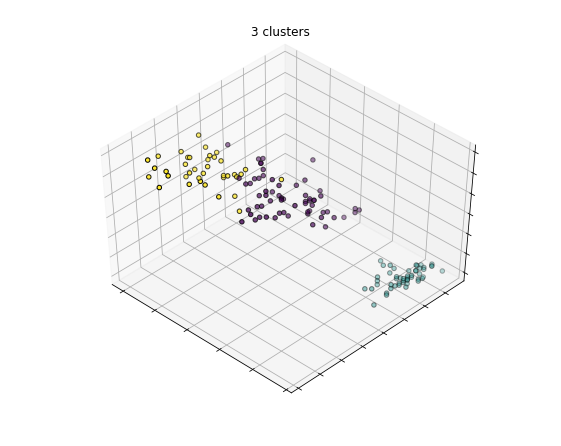

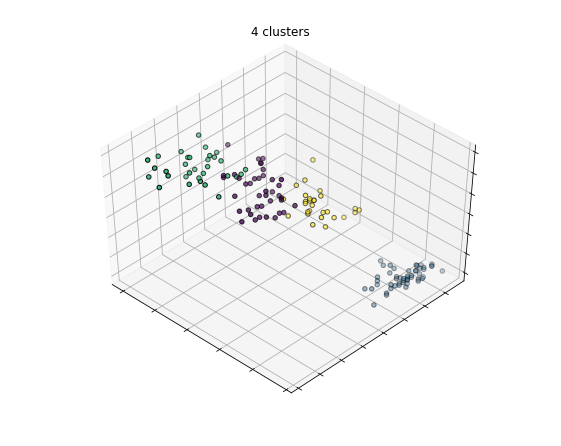

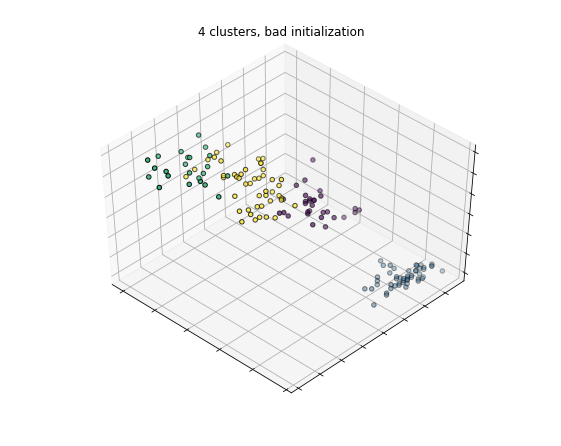

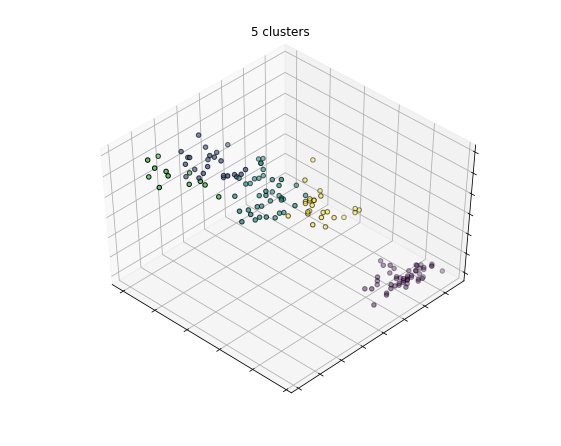

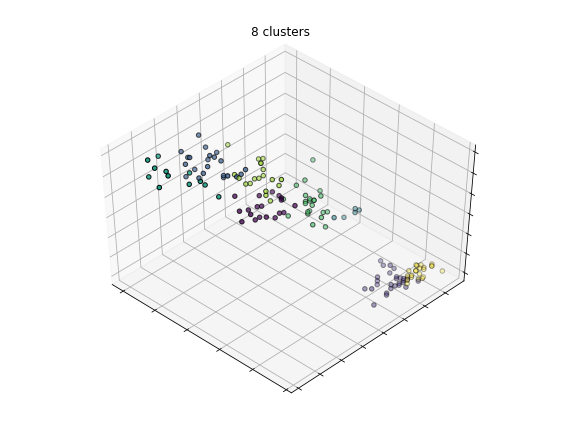

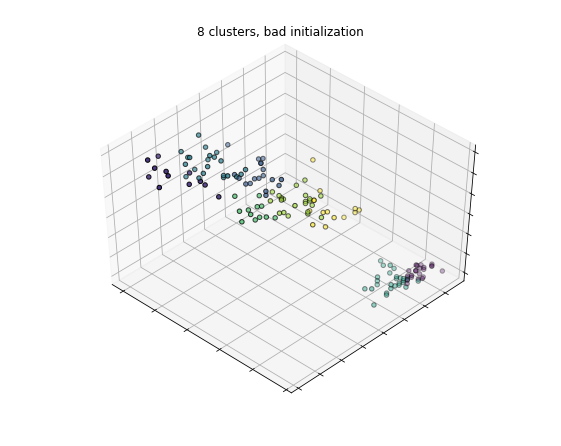

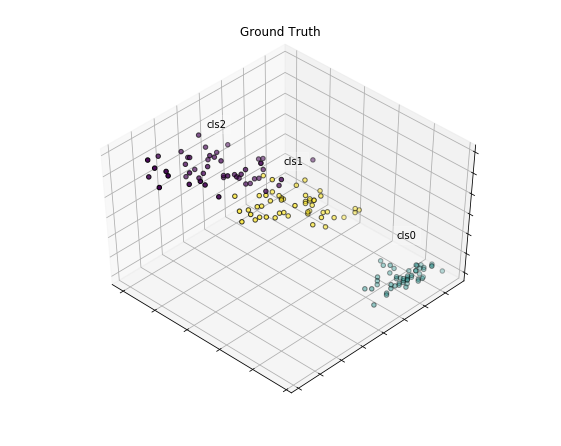

In [12]:
fignum = 1
titles = ['3 clusters', '4 clusters', '4 clusters, bad initialization',
          '5 clusters', '8 clusters', '8 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8,6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## [K-Means 成本函數 Loss Finction (medium)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43)


## <font color="red">K-means 成本函數</font>

假設有一組n個d維的資料

![img1](https://miro.medium.com/max/572/1*eh6qFaAZ5ZqI9sYV4yoFQQ.png)


設定有K(必須≤n)個Clusters {S1,S2,…,Sk}，K-means clustering就是希望可以最小化群內的資料和群心的誤差平方和越小越好，數學公式如下:

![img2](https://miro.medium.com/max/684/1*4w0jaA3xd9sJkTpIQZJqVQ.png)

μc就是群心，‖x-y‖就是算歐基里德距離(Euclidean distance)


## 演算法為

1. 初始隨機設定k個群心.

![img3](https://miro.medium.com/max/438/1*pOqdk2Vqgp-9tqnpIsDt6g.png)

2. 計算分類到每一群體的樣本，(t)為第t次運算

![img4](https://miro.medium.com/max/900/1*0CULTuFtQov2dytRgCUVZg.png)

3. 更新群心(nc個資料在第c群內。)

![img5](https://miro.medium.com/max/610/1*WdZn7bYGpBKJxpjccgBc9g.png)

4. 重複2–3，直到群心不變動，也就是

![img6](https://miro.medium.com/max/466/1*WjWZQBNQnCjJKCGae0xeyA.png)


> 什麼是非監督式學習? 就是你得到的資料你沒有任何Ground truth，你只有資料本身。

> - K-means Clustering這個方法概念很簡單，一個概念「物以類聚」。男生就是男生，女生就是女生，男生會自己聚成一群，女生也會自己聚成一群。
但在這群男生自己不會動成一群，女生也不會動成一群，在機器學習內，我們有的就是一組不會動的身高和體重的資料。那是什麼會動，讓男生女生可以區隔開的是什麼? 回頭看看演算法的名字，k-means，這邊的k是你想分成幾群，means就是每一群群心，所以會動的東西就是群心。這邊很懸，什麼是會動的群心??????
> - ### <font color = "dodgerblue">如果用實際的例子說，大家到新學校上學的時候有沒有一種感覺，第一天到的時候基本上大家都不熟，一個兩個人是一群，後來慢慢會有一群人聚在一起，沒幾天就分成兩群、三群，慢慢的到上學後一個月，基本上班上的小團體都分好了，每個團體都有一個key-man，你可以把這個key-man當作是群心，基本上大家都是因為有這個key-man聚在一起的(如果變節又是另一件事情)。那這個key-man在開學到小團體分好之前，基本上有可能會一直換來換去的，甚至多出一個key-man或是少一個key-man(演算法:ISODATA)，或是這個團體的key-man會因為別人的強勢而換掉，這就是會動=換掉的群心。</font>

## K-means運作概念步驟:

> 1. 我們先設定好要分成多少(k)群。
> 2. 然後在feature space(x軸身高和y軸體重組出來的2維空間，假設資料是d維，則會組出d維空間)隨機給k個群心。
> 3. 每個資料都會所有k個群心算歐式距離(歐基里德距離Euclidean distance，其實就是直線距離公式，從小學到大的那個距離公式，這邊距離當然也可以換成別種距離公式，但基本上都還是以歐式距離為主)。
> 4. 將每筆資料分類判給距離最近的那個群心。
> 5. 每個群心內都會有被分類過來的資料，用這些資料更新一次新的群心。
> 6. 一直重複3–5，直到所有群心不在有太大的變動(收斂)，結束。

## 參考資料

### 1. [Clustering 影片來源：Statistical Learning YT](https://www.youtube.com/watch?v=aIybuNt9ps4)

> <font color="red">因為K-Means的成本函數 不是 convex ，所以會得到 local minimum，不保證是 global minimum !</font>


### 2. [Clustering Means Algorithm 影片來源： [ Machine Learning | Andrew Ng ] YT](https://www.youtube.com/watch?v=hDmNF9JG3lo)

- K-Means

> 1. Cluster Assignment Step
> 2. Move Centroid

> ### [Coursera：Standford Machine Learning Week 8 筆記 (medium)](https://medium.com/@eren_queue/coursera-standford-machine-learning-week-8-%E7%AD%86%E8%A8%98-47798593aae3)

> K-Means 演算法
輸入：
參數 K (聚類數量)
訓練集 { x(1), x(2), …, x(m) }，其中 x(1) 為 n 維向量

> ### 演算法：![img1](https://miro.medium.com/max/1400/1*ddA6yTgzNybsOwGXxwTRtg.png)

> 1. 隨機初始化 K 個聚類中心 { μ1, μ2, μ3 … μK }
> 2. 第一個內部迴圈會計算每個樣本點（ 1 到 m ）分別與第幾個聚類中心的距離最近，找出最小的 k 後，將 x(i) 賦值給 c(i) 。

> ![img2](https://miro.medium.com/max/524/1*9nDD60Xz9MZWqNiZkChlhg.png)

> 3. 第二個內部迴圈會計算每個聚類（假如為第 2 個聚類，找出所有 c(i) = 2 的 x(i) ）內所有 x(i) 的平均值，假如計算後的均值為 0 ，則去除該中心，也就是最後會得到 K - 1 個聚類。如果你真的需要 K 個聚類，就重新隨機找一個聚類中心。


> ## 最佳化目標（Optimization Objective）
![img3](https://miro.medium.com/max/1400/1*i-WPc7GhfmcCRPRHdHww4Q.png)

> ## 隨機初始化（Random Initialization）

> - 我們知道執行 K-Means 演算法時，必須先決定初始的聚類中心，取決初始點的不同，可能會造成 K-Means 有不同的結果。
> - 因此我們要做的事，就是迭代整個 K-Means 的過程，每一次都採用隨機初始化。
![img4](https://miro.medium.com/max/1400/1*VTt45sQ_Z8LcJQG3Hff0qQ.png)

> 如上圖所示，迭代完成後會得到 100 種成本函數，並從中挑選最小的成本函數作為我們最終的成本函數。
通常來說，當我們的所有分的聚類 K 很小（約 2 - 10 之間），採用多次迭代不同的隨機初始值並比較成本函數，可以得到更好的局部最佳解。但是當 K 太大時，這樣的迭代就不會有太大的效果。

> ## 選擇群集數量（Choosing the Number of Clusters）

> 以下是人們對這個問題比較常見的思考方式：

> ### - Elbow method
透過不斷地改變 K 的數量並迭代多次成本函數，觀察其成本函數和 K 的變化（肘點位置）來決定最終結果。
![img5](https://miro.medium.com/max/1400/1*Z7xX2DP4aJLbUnMS2N1xYw.png)

> 當然，你也可能如上右圖，無法觀察出肘點在哪裡。


### 3. [Unsupervised Machine Learning:Flat Clustering](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/)
